In [1]:
import pandas as pd
import datetime

stories = pd.read_csv('data/bosh_stories.csv')

stories['created_at'] = pd.to_datetime(stories['created_at'])
stories['accepted_at'] = pd.to_datetime(stories['accepted_at'])
stories['updated_at'] = pd.to_datetime(stories['updated_at'])

stories.sort('created_at', inplace=True)
stories['estimate'].fillna(0, inplace=True)
stories_without_nans = stories.dropna(subset=['accepted_at'])

# Calculate week buckets
def get_week_num_from_date(date):
    first_date = stories['created_at'].head(1).values[0]
    days_since_start = date - first_date
    week_since_start = days_since_start / datetime.timedelta(days=7)
    return math.floor(week_since_start)

import math
stories_without_nans['accepted_at_week'] = stories_without_nans['accepted_at'].apply(get_week_num_from_date)
stories_without_nans['created_at_week'] = stories_without_nans['created_at'].apply(get_week_num_from_date)

story_type_counts_by_created_week = stories_without_nans.groupby(['created_at_week','story_type']).count()['id']

week_data = story_type_counts_by_created_week.unstack().fillna(0)

velocity_by_week = stories_without_nans.groupby(['accepted_at_week']).sum()['estimate']
week_data['points'] = velocity_by_week
week_data.fillna(0, inplace=True)

/home/sam/.virtualenvs/velocity/lib/python3.4/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/sam/.virtualenvs/velocity/lib/python3.4/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sam/.virtualenvs/velocity/lib/python3.4/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
import json
import ast

def make_row(iteration_row):
    stories = ast.literal_eval(iteration_row.stories)
    for s in stories:
        s['iteration'] = iteration_row.number
        s['team_strength'] = iteration_row.team_strength
    
    return stories

iteration_df = pd.read_csv('data/bosh_iterations.csv')

iterations = iteration_df.apply(make_row, 1).values
all_stories = []
for iteration in iterations:
    all_stories.extend(iteration)

In [3]:
story_df = pd.DataFrame(all_stories)
story_df.estimate.fillna(0, inplace=True)
story_df.head()

,accepted_at,created_at,current_state,deadline,description,estimate,id,iteration,kind,labels,name,owned_by_id,owner_ids,project_id,requested_by_id,story_type,team_strength,updated_at,url
0,2013-11-15T18:41:07Z,2013-10-16T20:57:37Z,accepted,NaN,follow-on from #56532652\n\nthe new box is rea...,0,59004602,1,story,"[{'updated_at': '2013-11-14T20:34:18Z', 'proje...",roll the 'old' prod jumpbox to the new instance,756869,[756869],956238,1338772,chore,0.3,2013-11-15T18:41:22Z,https://www.pivotaltracker.com/story/show/5900...
1,2013-11-15T21:35:47Z,2013-10-24T22:02:23Z,accepted,NaN,ci build was aborted and didnt have a chance t...,0,59523646,1,story,"[{'updated_at': '2013-11-14T20:34:18Z', 'proje...",vsphere microbosh bats should clean up before ...,1068489,[1068489],956238,81882,chore,0.3,2013-11-15T21:35:48Z,https://www.pivotaltracker.com/story/show/5952...
2,2013-11-15T21:36:01Z,2013-10-29T19:00:55Z,accepted,NaN,NaN,0,59778912,1,story,"[{'updated_at': '2013-11-14T20:34:18Z', 'proje...",Rebuild Jumpboxes in A1 & Prod,756869,[756869],956238,81882,chore,0.3,2013-11-15T21:36:03Z,https://www.pivotaltracker.com/story/show/5977...
3,2013-11-19T21:45:03Z,2013-11-19T01:45:09Z,accepted,NaN,Automation creates a release and uploads it. S...,0,61008990,2,story,[],Investigate AWS bosh partial release upload,1068489,[1068489],956238,1068489,chore,1.0,2013-11-19T21:45:15Z,https://www.pivotaltracker.com/story/show/6100...
4,2013-11-20T07:23:56Z,2013-11-19T04:57:12Z,accepted,NaN,see details: https://groups.google.com/a/cloud...,0,61014318,2,story,[],review and advise on bosh director template er...,1068489,[1068489],956238,494053,feature,1.0,2013-11-20T07:23:56Z,https://www.pivotaltracker.com/story/show/6101...


In [4]:
def count_unique_users(weekly_users):
    return len(set(weekly_users))

In [47]:
special_iteration_df = pd.read_csv('data/bosh_special_iterations.csv')
special_iteration_df.head()

,accepted,analytics,effective_points,length,number,points,story_ids,team_strength,velocity
0,"{'header': ['date', 'story_type', 'points_acce...","{'cycle_time': 0, 'stories_accepted': 3, 'reje...",0.000000,1,1,0,"[59004602, 59523646, 59778912]",0.30,10
1,"{'header': ['date', 'story_type', 'points_acce...","{'cycle_time': 0, 'stories_accepted': 13, 'rej...",13.000000,1,2,13,"[61008990, 61014318, 60955736, 60125634, 60860...",1.00,10
2,"{'header': ['date', 'story_type', 'points_acce...","{'cycle_time': 0, 'stories_accepted': 5, 'reje...",5.000000,1,3,2,"[57964476, 61162324, 61568252, 61074790, 61084...",0.40,10
3,"{'header': ['date', 'story_type', 'points_acce...","{'cycle_time': 0, 'stories_accepted': 15, 'rej...",11.250000,1,4,9,"[61412354, 61179184, 61857938, 61843830, 61179...",0.80,6
4,"{'header': ['date', 'story_type', 'points_acce...","{'cycle_time': 0, 'stories_accepted': 19, 'rej...",15.294118,1,5,13,"[62001564, 62208014, 62258414, 62202440, 61708...",0.85,9


In [46]:
special_iteration_df.analytics[0]

analytics_df = pd.DataFrame(list(special_iteration_df.analytics.apply(ast.literal_eval).values))
analytics_df['iteration'] = special_iteration_df.number
analytics_df.head()

,bugs_created,cycle_time,kind,rejection_rate,stories_accepted,iteration
0,2,0,analytics,0,3,1
1,4,0,analytics,0,13,2
2,2,0,analytics,0,5,3
3,5,0,analytics,0,15,4
4,7,0,analytics,0,19,5


In [7]:
week_group = story_df.groupby('iteration')
week_data = week_group.agg({'estimate': sum, 'team_strength': 'first'})
week_data.rename(columns={'estimate': 'total_points'}, inplace=True)
week_data['contributors'] = week_group.owner_ids.sum().apply(count_unique_users)

# Effective points is given as a beta feature from the iteration API
week_data['effective_points'] = week_data['total_points'] / week_data['team_strength']
#week_data['effective_points'] = special_iteration_df['effective_points']
week_data['effective_std'] = pd.rolling_std(week_data['effective_points'], 3).shift(1)
week_data['effective_mean'] = pd.rolling_mean(week_data['effective_points'], 3).shift(1)
week_data['effective_mean']
week_data['volatility'] = week_data['effective_std'] / week_data['effective_mean'] * 100


In [49]:
weeks = week_data.merge(analytics_df, right_on='iteration', left_index='iteration')
weeks['stds_outside_volatile_range'] = abs(weeks.effective_points - weeks.effective_mean) / weeks.effective_std
weeks.head()

,total_points,team_strength,contributors,effective_points,effective_std,effective_mean,volatility,bugs_created,cycle_time,kind,rejection_rate,stories_accepted,iteration,stds_outside_volatile_range
0,0,0.30,2,0.000000,NaN,NaN,NaN,2,0,analytics,0,3,1,NaN
1,13,1.00,7,13.000000,NaN,NaN,NaN,4,0,analytics,0,13,2,NaN
2,2,0.40,3,5.000000,NaN,NaN,NaN,2,0,analytics,0,5,3,NaN
3,9,0.80,6,11.250000,6.557439,6.00,109.290642,5,0,analytics,0,15,4,0.800617
4,13,0.85,8,15.294118,4.205651,9.75,43.134882,7,0,analytics,0,19,5,1.318254


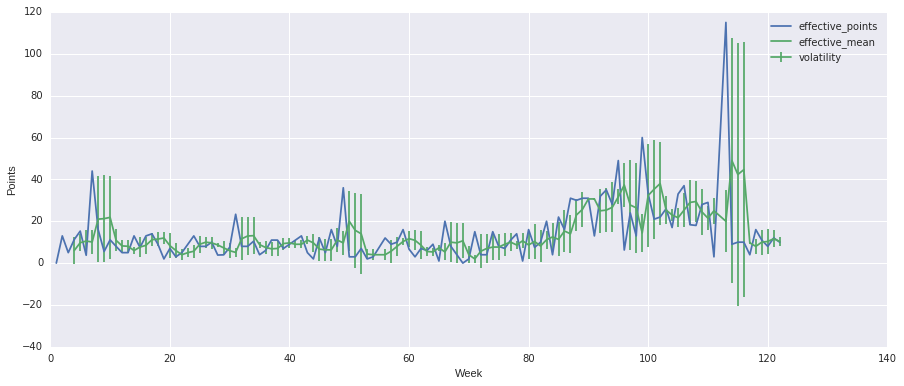

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,6))
plt.plot(weeks.iteration, weeks.effective_points, label='effective_points')
plt.errorbar(weeks.iteration, weeks.effective_mean, yerr=weeks.effective_std, label='volatility')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Points')

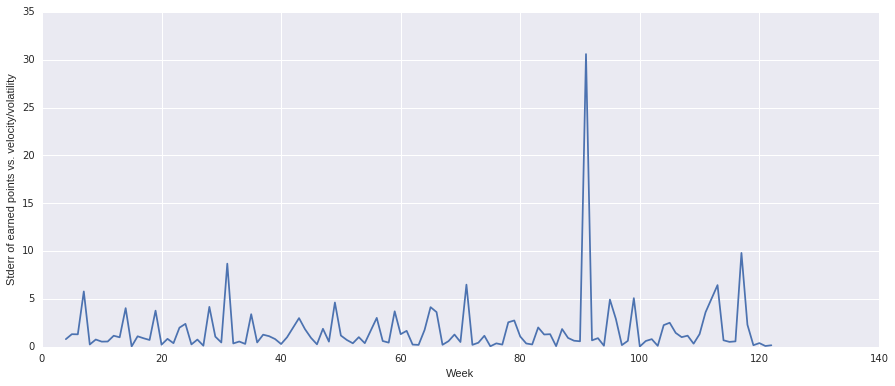

In [51]:
plt.figure(figsize=(15,6))
plt.plot(weeks.iteration, weeks.stds_outside_volatile_range)
plt.xlabel('Week')
plt.ylabel('Stderr of earned points vs. velocity/volatility')

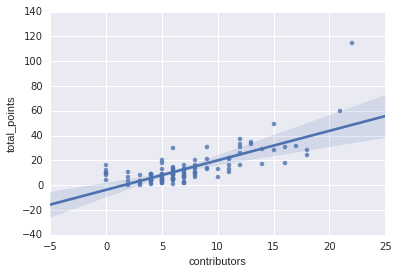

In [33]:
# Relationship between contributors and total points?
sns.regplot(weeks.contributors, weeks.total_points)

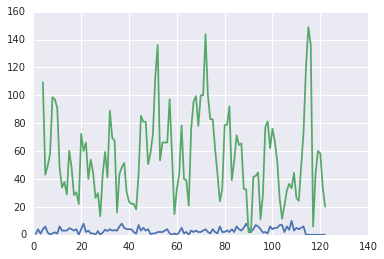

In [37]:
### I want this to ask questions about lag effects that bugs_created has on volatility.

plt.plot(weeks.iteration, weeks.bugs_created * weeks.team_strength)
plt.plot(weeks.iteration, weeks.volatility)